## Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau, linregress
import numpy as np
import warnings
import scipy.stats as stats
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metaprivBIDS_stat import plot_calc
from metaprivBIDS_stat import rst_outlier_case2

## File from OpenNeuro Import
DALLAS is the raw dataset "The Dallas Lifespan Brain Study" taken from OpenNeuro. 


In [2]:
DALLAS = 'https://s3.amazonaws.com/openneuro.org/ds004856/participants.tsv?versionId=IwNXA1rR0LIzEtfMB3kPETHQpZzbovbu'
DALLAS = pd.read_csv(DALLAS, sep='\t')
DALLAS.to_csv('data_ds004856/DALLAS_dataset_ds003097.csv', sep=',', index=False)

## Load in of results calculated using (MetaprivBIDS App)

The selected quasi identifers are: 
- AgeCog_W1
- Height_W1
- HandednessScore
- EduYrsEstCap
- Race
- EduComp
- Sex
- Ethnicity

The selected sensitive variables are:
- Race & ethhnicity

The dis-score fraction is the default 0.3 & missing values are indicated as NaN.

In [3]:
suda = pd.read_csv('data_ds004856/suda_ds004856.csv', sep=',')
pif = pd.read_csv('data_ds004856/pif_df004856.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds004856/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds004856/normalized_difference_dallas.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds004856/k-combined-3-to-11.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds004856/non_normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})

## Using MetaprivBIDS stats import to calculate Pearson and Spearman correlation on row level.


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.57, P-value: 0.0000
Kendall's Tau between suda & pif: 0.40, p-value: 0.0000
Pearson Correlation between suda & pif: 0.3306


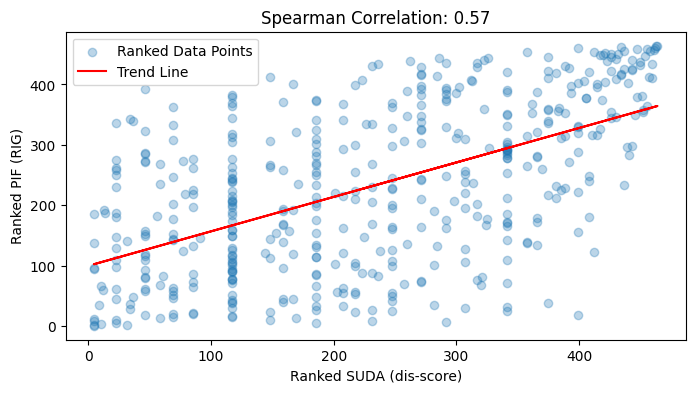

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.83
Pearson Correlation between K-combined & PIF field level: 0.69
Pearson Correlation between SUDA & K-combined field level: 0.76


Spearman Rank Correlation between PIF & SUDA: 0.71, P-value: 0.0713
Spearman Rank Correlation between PIF & K: 0.80, P-value: 0.0301
Spearman Rank Correlation between SUDA & K: 0.40, P-value: 0.3728


In [4]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

## Iterating through all possible combination of variables & calculating the correlation between SUDA, K-Global and PIF 

In [5]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, DALLAS, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: 0.73
Pearson Correlation between Suda sum and K-combined: 0.56


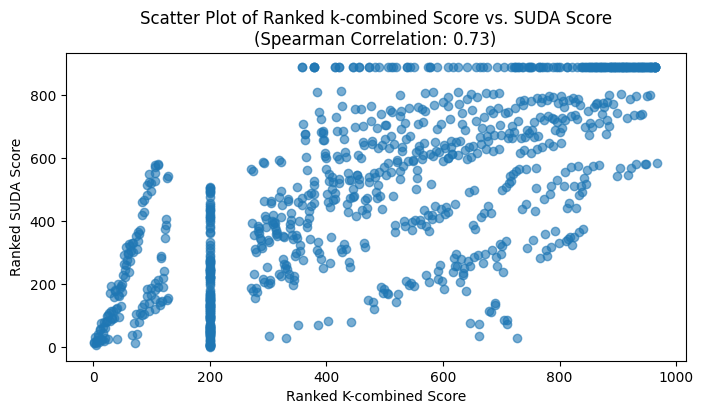

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: 0.80
Pearson Correlation between PIF 95% and K-combined: 0.77


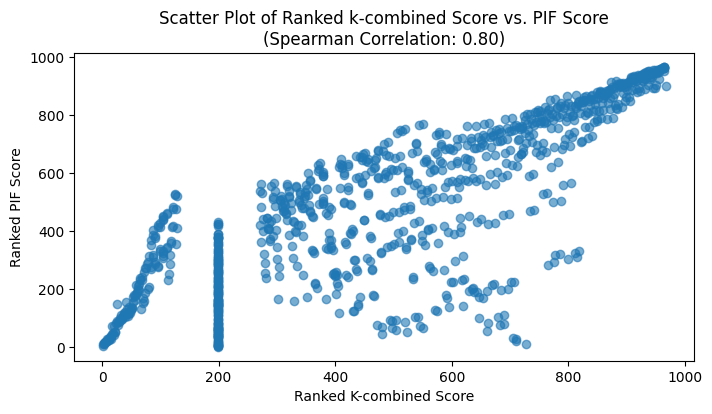

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.84
Pearson Correlation between PIF 95% and SUDA: 0.82


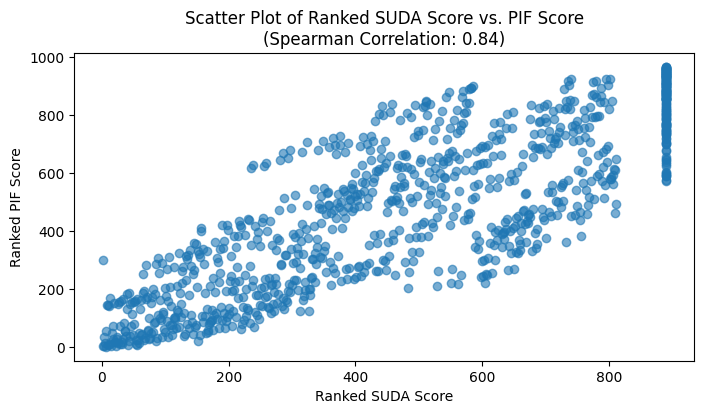

In [6]:
plot_calc(sum_score_df)

# T-test between risky and non-risky k-global values for variables. 


### Non risk variables

In [8]:
k_combined_field_non_risk

,variable,Normalized Difference
0,MMSE_W3,0.0
1,MMSE_W2,0.0
2,MMSE_W1,0.0
3,Height_W2,0.0
4,AgePETTau_W2,0.0
5,BMI_W1,0.0
6,BMI_W2,0.0
7,CogW1toW3,0.0
8,CogW2toW3,0.0
9,MRIW1toW3,0.0


### Risk Variables 

In [12]:
k_combined_field

,variable,Normalized Difference
0,AgeCog_W1,1.6
1,Height_W1,1.3
2,HandednessScore,0.3
3,EduYrsEstCap,0.0
4,Race,0.0
5,EduComp,0.0
6,Sex,0.0
7,Ethnicity,0.0


## Result of Paired T-test


In [13]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)

Mean, risk identifiers: 0.4


In [14]:
mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)

Mean, non-risk identifiers: 0.0


In [17]:
t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

t: 3.2632406432560748 p-value: 0.002565193272726757


# Outlier detection for SUDA & PIF


### SUDA outlier 

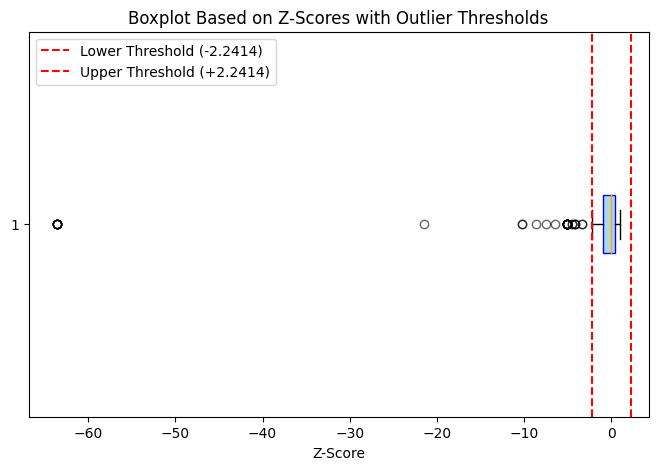

Higher End Outliers []


Normalized MAD 0.015418828762045908
MAD 0.010399999999999965


[(-3.113076923076936, 15), (-6.479091346153867, 40), (-5.084692307692326, 49), (-63.6040528846156, 56), (-5.084692307692326, 63), (-5.084692307692326, 65), (-3.113076923076936, 66), (-10.292610576923115, 86), (-5.084692307692326, 89), (-63.6040528846156, 91), (-5.084692307692326, 93), (-3.113076923076936, 98), (-3.113076923076936, 133), (-5.084692307692326, 142), (-5.084692307692326, 152), (-3.113076923076936, 160), (-5.084692307692326, 168), (-3.113076923076936, 177), (-10.292610576923115, 191), (-5.084692307692326, 192), (-2.6331442307692376, 194), (-3.113076923076936, 200), (-4.11834134615386, 201), (-8.664730769230802, 210), (-3.113076923076936, 215), (-3.113076923076936, 223), (-2.6331442307692376, 237), (-2.432091346153853, 243), (-3.4049278846153954, 245), (-5.084692307692326, 246), (-5.084692307692326, 253), (-5.084692307692326, 261), (-3.113076923076936, 275), (-4.11834134615386, 278), (-3.

In [15]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices, outlier_tuples = rst_outlier_case2(suda, 'dis-score')
print('Higher End Outliers',above_outlier_indices)
print('\n')
print('Normalized MAD',madn)
print('MAD',mad)
print('\n')

print(outlier_tuples)


### PIF Oulier 

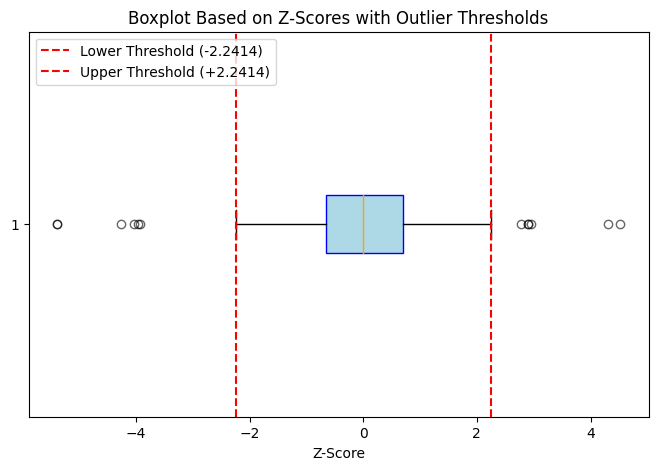

Higher End Outliers [25, 32, 48, 51, 58, 128, 172, 179, 216, 279, 328, 356, 379, 457]


Normalized MAD 4.514661592638306
MAD 3.0451392442345373


[(2.946698804430886, 25), (2.663449470013625, 32), (2.686061165407411, 48), (2.6151224435970053, 51), (4.314606127253669, 58), (2.6961679776746923, 128), (2.8996250264850625, 172), (2.8913956171140383, 179), (-2.5722167202603257, 181), (-4.026804810438139, 191), (2.2707600666388683, 216), (2.485451015266347, 279), (-5.388676949408279, 316), (-3.927226721274977, 319), (2.7854298541305282, 328), (-5.392501978062517, 353), (2.528122004883051, 356), (-3.9697229154557707, 366), (2.426302788131322, 379), (-4.2628197697141195, 407), (4.52611967946067, 457)]


In [13]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices, outlier_tuples = rst_outlier_case2(pif, 'RIG')
print('Higher End Outliers',above_outlier_indices)
print('\n')
print('Normalized MAD',madn)
print('MAD',mad)
print('\n')

print(outlier_tuples)


## Outlier Participant  

In [44]:
column_names = [
    
    "participant_id",
    "AgeCog_W1",
    "Height_W1",
    "HandednessScore",
    "EduYrsEstCap",
    "Race",
    "EduComp",
    "Sex",
    "Ethnicity"
]
DALLAS[column_names].loc[58]

participant_id     sub-1362
AgeCog_W1                54
Height_W1              61.0
HandednessScore       3.909
EduYrsEstCap           20.0
Race                      3
EduComp                 5.0
Sex                       f
Ethnicity               1.0
Name: 58, dtype: object